Text(0.5, 1.0, 'Original image')

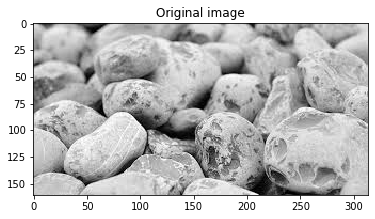

In [3]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
original_img = cv2.imread("light.jpg")

plt.imshow(original_img)
plt.title("Original image")

Text(0.5, 1.0, 'Specified image')

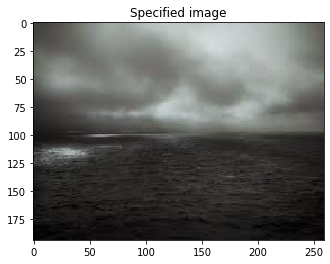

In [4]:
specified_img = cv2.imread("dark.jpg")

plt.imshow(specified_img)
plt.title("Specified image")

In [5]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [6]:
def hist_match(original, specified):
    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()
    
    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique (original, return_inverse = True, return_counts = True) # if inv returns idx for reconstruct
    t_values, t_counts = np.unique(specified, return_counts = True)
    
    #calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /=s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    
    # round the values
    s_q = np.around(s_quantiles*255)
    t_q = np.around(t_quantiles*255) # till here equalization step only
    
    #Map the rounded values
    x = []
    for d in s_q[:]:
        x.append(find_nearest_above(t_q,d))
    x = np.array(x,dtype = 'uint8')
    
    return x[bin_idx].reshape(oldshape)

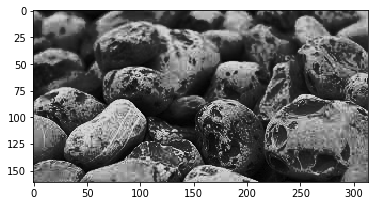

In [7]:
a = hist_match(original_img, specified_img)
plt.imshow(np.array(a, dtype = 'uint8'), cmap = "gray")
# print(a)

(4608, 3456)
15925248


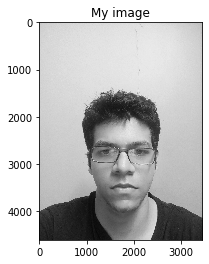

In [8]:
MITHIL = cv2.imread("MITHIL.jpg", 0)

plt.imshow(MITHIL, cmap = "gray")
plt.title("My image")
print(MITHIL.shape)
print(MITHIL.size)



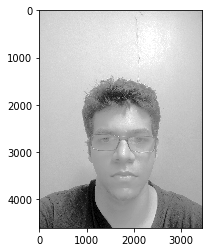

In [7]:
b = hist_match(MITHIL, original_img)
plt.imshow(np.array(b, dtype = 'uint8'), cmap = "gray")

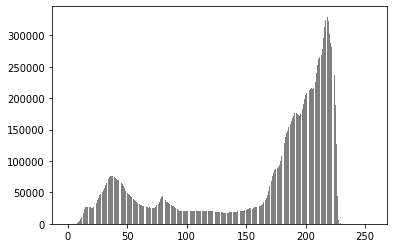

In [12]:
def Hist(img):
    row, col = img.shape
    y = np.zeros((256), np.uint64)
    for i in range(0, row):
        for j in range(0, col):
            y[img[i, j]]+=1
    x = np.arange(0, 256)
    plt.bar(x,y, color= "gray", align = "center")
    plt.show()
    return y
y = Hist(MITHIL)


In [13]:
print(len(np.unique(y)))

244


636411


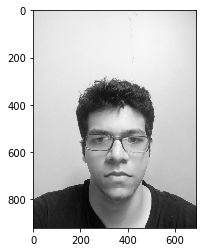

In [9]:
scale_percent = 20  # percent of original size
width = int(MITHIL.shape[1] * scale_percent / 100)
height = int(MITHIL.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(MITHIL, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized, cmap = "gray")
print(resized.size)

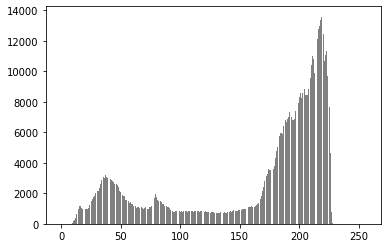

In [10]:
k = Hist(resized)

Text(0.5, 1.0, 'negative image')

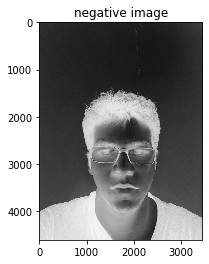

In [9]:
y = np.shape(MITHIL)
z = np.zeros(y)
z = 255- MITHIL

plt.imshow(z, cmap ="gray")
plt.title("negative image")